In [ ]:
import os
print(os.getcwd())


c:\Users\valen\Documents\Maestria\Analitica descriptiva\LAB-07-matplotlib-news-plot-vatamayog\homework


In [3]:
os.chdir("..")

In [4]:
print(os.getcwd())

c:\Users\valen\Documents\Maestria\Analitica descriptiva\LAB-07-matplotlib-news-plot-vatamayog


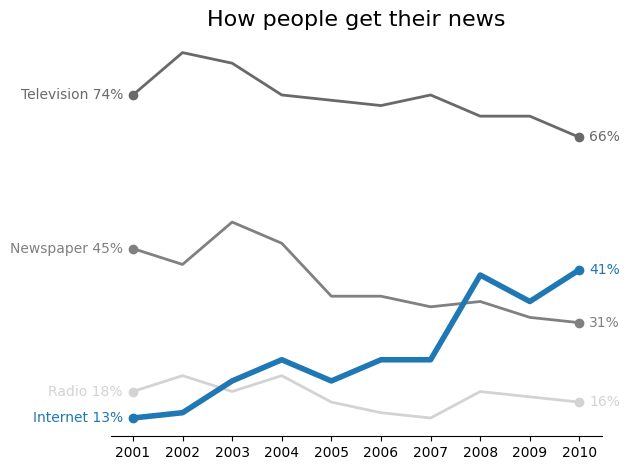

In [6]:
"""
Escriba el codigo que ejecute la accion solicitada en cada pregunta.
"""


import pandas as pd
import matplotlib.pyplot as plt
import os

os.makedirs("files/plots", exist_ok=True)

plt.Figure()

colors = {
    "Television": "dimgray",
    "Newspaper": "grey",
    "Internet": "tab:blue",
    "Radio": "lightgrey"
}
zorder = {
    "Television": 1,
    "Newspaper": 1,
    "Internet": 2,
    "Radio": 1
}

linewidths = {
    "Television": 2,
    "Newspaper": 2,
    "Internet": 4,
    "Radio": 2
}


df = pd.read_csv("files/input/news.csv", index_col=0)

for col in df.columns:
    plt.plot(
        df[col], 
        label=col, 
        color=colors[col], 
        zorder=zorder[col],
        linewidth=linewidths[col]
        )

plt.title("How people get their news", fontsize=16)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

for col in df.columns:
    first_year = df.index[0]
    plt.scatter(
        x=first_year,
        y=df[col][first_year],
        color=colors[col],
        zorder=zorder[col]
    )

    plt.text(
        first_year - 0.2,
        df[col][first_year],
        col + " " + str(df[col][first_year]) + "%",
        ha="right",
        va="center",
        color=colors[col],
    )

    last_year = df.index[-1]
    plt.scatter(
        x=last_year,
        y=df[col][last_year],
        color=colors[col],
        zorder=zorder[col]
    )


    plt.text(
        last_year + 0.2,
        df[col][last_year],
        str(df[col][last_year]) + "%",
        ha="left",
        va="center",
        color=colors[col],
    )

plt.xticks(
    ticks=df.index,
    labels=df.index,
    ha="center",
)
plt.tight_layout()
plt.savefig("files/plots/news.png")